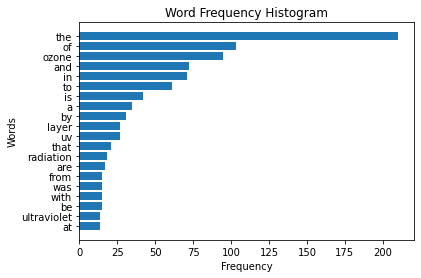

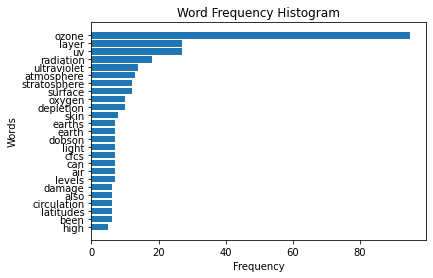

In [1]:
import requests
import re
import matplotlib.pyplot as plt
 
def get_content(article_name):
      title = article_name
      url = 'https://en.wikipedia.org/w/api.php'
      params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "meta": "",
        "titles": title,
        "formatversion": "2",
        "rvprop": "content",
        "rvslots": "*",
      }
      response = requests.get(url, params=params)
      return response.json()

def merge_contents(data):
        data = data["query"]["pages"][0]["revisions"][0]["slots"]["main"]["content"]
        data = re.sub('<[^<]+?>', '', data)
        data = re.sub(r'\{\{cite\s.*?\}\}', '', data)
        data = re.sub(r'\{\{Cite\s.*?\}\}', '', data)
        data = re.sub(r'http\S+', '', data)
        data = re.sub(r'==See also==[\s\S]*', '', data)
        data = re.sub(r'Image:.*?px|', '', data)
        data = re.sub(r'File:.*?(jpg|jpeg|px|svg|png)|', '', data)
        data = re.sub(r'\{\{.*?\}\}', '', data)
        data = re.sub(r'(\'|\")', '', data)
        data = re.sub(r'[()\[\]{}"]', '', data)
        data = re.sub(r'\|', ' ', data)
        data = re.sub(r'\+', '', data)
        data = re.sub(r'(>|<|&|;|:)', '', data)
        data = re.sub(r'=', '', data) 
        return data

def tokenize(content):
    content = re.sub(r'\.', '', content)
    content = re.sub(r',', '', content)
    content = re.sub(r'-', ' ', content)
    content = re.sub(r'–', ' ', content)
    content = content.split()
    return content
    
def lower_collection(collection):
    collection = [word.lower() for word in collection]
    return collection
    
def count_frequency(collection):
    word_f = {}
    for word in collection:
        if word in word_f:
            word_f[word] += 1
        else:
            word_f[word] = 1
    return word_f


def print_most_frequent(frequencies, n):
    sorted_dict = dict(sorted(frequencies.items(), key=lambda x: x[1], reverse=True)[:n])
    words = list(sorted_dict.keys())
    freqs = list(sorted_dict.values())
    words.reverse()
    freqs.reverse()
    plt.barh(range(len(words)), freqs)
    plt.yticks(range(len(words)), words)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Word Frequency Histogram")
    plt.show()
    
def remove_stop_words(words, stop_words):
    for word in stop_words:
        if word in words:
            del words[word]
    return words
            
  
data = get_content("Ozone layer")
merge_content = merge_contents(data)
collection = tokenize(merge_content)
collection = lower_collection(collection)
collection = count_frequency(collection)
stop_words = [ "the", "a", "of", "to", "in", "c", "about", "by", "and", "is", "an", "that", "are", "was", "from", "with", "be", "at","has","as","have","it","for","this","which","on","these","b","or","all","into","most","because","not","over","out","being"]
print_most_frequent(collection, 20)
collection = remove_stop_words(collection, stop_words)
print_most_frequent(collection, 25)

In [2]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User saydulla_b connection: OK


<MY_MR_CLEAN>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT           MY MR CLEAN    

 Status             FAILURE EXECUTION 
 Execution Runtime  1.325660          
 Score              [] 0/0            

Your Stderr:
Correction crashed: errors in your file. Try to run it with ipython to see them.
</MY_MR_CLEAN>
